##### Maël Thuillier 79372
##### Grigory Sheleg 80985
##### Philippe de Parcevaux 80677
##### Solal Fuster 72950

##### If you want to have a quick, but non-exhaustive, understanding of what we did and achieved in term of model performance during this assignment we advise you to read our readme.md file which is the summary of this long and complete notebook.
##### It can be quite long to run the entire notebook entirely (from 1 to 3 hours depending on your computational power), so if you just need the output you have access to a pdf with all the code and the output or the readme.md file with a summary of our work.



<h2><p align ='center'> Coursework 2 - Loan Default Probability </h2>

The goal of this case study is to build a machine learning model to predict the probability that a loan will default. By the end of the analysis you should be able to recommend a choice of model and associated hyperparameters.

I will provide you with guidance on what to do. Please follow it. You are free to propose and test your own additional modelling suggestions at the end of the notebook. Make sure you describe this clearly.

In [1]:
# Disable the warnings
import warnings
warnings.filterwarnings('ignore')

## Overview

* [1. Problem Definition](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Data Preparation and Feature Selection](#2)
    * [3.1. Preparing the predicted variable](#2.1)    
    * [3.2. Feature Selection-Limit the Feature Space](#2.2)
        * [3.2.1.  Features elimination by significant missing values ](#2.2.1)
        * [3.2.2.  Features elimination based on the intutiveness](#2.2.2)
        * [3.2.3.  Features elimination based on the correlation](#2.2.3)   
* [4. Feature Engineering and Exploratory Analysis](#3)
    * [4.1 Feature Analysis and Exploration](#3.1)
        * [4.1.1. Analysing the categorical features](#3.1.1)
        * [4.1.2  Analysing the continuous features ](#3.1.2)
    * [4.2.Encoding Categorical Data](#3.2)
    * [4.3.Sampling Data](#3.3)    
* [5.Evaluate Algorithms and Models](#4)        
    * [5.1. Train/Test Split](#4.1)
    * [5.2. Test Options and Evaluation Metrics](#4.2)
    * [5.3. Compare Models and Algorithms](#4.3)
* [6. Model Tuning and Grid Search](#5)  
* [7. Finalize the Model](#6)  
    * [7.1. Results on test dataset](#6.1)
    * [7.1. Variable Intuition/Feature Selection](#6.2)
    * [7.3. Save model for later use](#6.3)


<a id='0'></a>
# 1. Problem Definition

This case study aims to analyze data for loans through 2007-2017Q3 from Lending Club available on Kaggle. Dataset contains over 887 thousand observations and 150 variables among which one is describing the loan status. The predicted variable is “Charge-Off ”. A charge-off is a debt that a creditor has given up trying to collect on after you’ve missed payments for several months. You want a model that can predict charge-off.

<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

## 2.1. Load all the python packages you need here

In [2]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve,accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, PassiveAggressiveClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier

<a id='1.2'></a>
## 2.2. Loading the Data

### Load the data in this step. This is in the form of a zipped csv file LoansData_sample.csv.gz - see how you load a zipped csv file in the pandas documentation. Use a utf-8 encoding. Call the dataframe "dataset"

### We import out dataset:

In [3]:
dataset = pd.read_csv(r"LoansData_sample.csv.gz", compression='gzip', encoding='utf-8', low_memory=False)

### We print the first few rows of the dataset:

In [4]:
dataset.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,0,38098114,NaN,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1,36805548,NaN,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,2,37842129,NaN,21425.0,21425.0,21425.0,60 months,15.59,516.36,D,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,3,37612354,NaN,12800.0,12800.0,12800.0,60 months,17.14,319.08,D,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,4,37662224,NaN,7650.0,7650.0,7650.0,36 months,13.66,260.20,C,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


### We examine the properties of the dataframe:

In [5]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 151 entries, Unnamed: 0 to settlement_term
dtypes: float64(115), int64(2), object(34)
memory usage: 115.2+ MB
None


In [6]:
print(dataset.describe())

          Unnamed: 0            id  member_id      loan_amnt    funded_amnt  \
count  100000.000000  1.000000e+05        0.0  100000.000000  100000.000000   
mean    49999.500000  3.029995e+07        NaN   14886.930000   14886.930000   
std     28867.657797  4.763500e+06        NaN    8504.432514    8504.432514   
min         0.000000  5.716700e+04        NaN    1000.000000    1000.000000   
25%     24999.750000  2.737015e+07        NaN    8000.000000    8000.000000   
50%     49999.500000  3.052556e+07        NaN   13050.000000   13050.000000   
75%     74999.250000  3.438201e+07        NaN   20000.000000   20000.000000   
max     99999.000000  3.809811e+07        NaN   35000.000000   35000.000000   

       funded_amnt_inv       int_rate    installment    annual_inc  \
count    100000.000000  100000.000000  100000.000000  1.000000e+05   
mean      14883.910500      13.278073     437.331824  7.468924e+04   
std        8502.519174       4.390210     244.317648  5.809527e+04   
min     

In [7]:
dataset.isnull().sum()

Unnamed: 0                    0
id                            0
member_id                100000
loan_amnt                     0
funded_amnt                   0
                          ...  
settlement_status         98710
settlement_date           98710
settlement_amount         98710
settlement_percentage     98710
settlement_term           98710
Length: 151, dtype: int64

In [8]:
print(dataset.duplicated().sum())

0


##### We have no duplicated rows, so nothing to remove on that side.
#####
##### We analyse the shape of the dataset:

In [9]:
print(dataset.shape)

(100000, 151)


##### We have 100,000 * 151 = 151,000 entries.
#####
##### We then look for unique values, which allow us to see which features might be interesting for the LabelEncoding part of the project:

In [10]:
print(dataset.nunique())

Unnamed: 0               100000
id                       100000
member_id                     0
loan_amnt                  1254
funded_amnt                1254
                          ...  
settlement_status             3
settlement_date              35
settlement_amount          1244
settlement_percentage       264
settlement_term              24
Length: 151, dtype: int64


### We drop the unnamed column with the number of entries:

In [11]:
dataset = dataset.drop('Unnamed: 0', axis=1)
print(dataset.shape)

(100000, 150)


<a id='2'></a>
## 3. Data Preparation and Feature Selection

<a id='2.1'></a>
## 3.1. Preparing the predicted variable


## The column to predict is loan_status. Look at the values it takes and their counts.

In [12]:
print(dataset['loan_status'].unique())
print(dataset['loan_status'].describe())

['Fully Paid' 'Charged Off' 'Current' 'Late (31-120 days)'
 'Late (16-30 days)' 'In Grace Period' 'Default']
count         100000
unique             7
top       Fully Paid
freq           69982
Name: loan_status, dtype: object


##### loan_status takes 7 values: 'Fully Paid', 'Charged Off', 'Current', 'Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period', 'Default'.

## You need to try to learn differences in the features between completed loans that have been fully paid or charged off. Don't consider loans that are current, don't meet the credit policy, defaulted, or have a missing status. So only keep the loans with status "Fully Paid" or "Charged Off." Count the number of each.

In [13]:
# Data Visualization
status_counts = dataset['loan_status'].value_counts().reset_index()
status_counts.columns = ['loan_status', 'count']
status_counts = status_counts[status_counts['loan_status'].isin(['Fully Paid', 'Charged Off'])]

custom_colors = {'Charged Off': '#FF6F61', 'Fully Paid': '#6BAED6'}

fig = px.bar(
    status_counts,
    x='loan_status',
    y='count',
    title='Number of Loans by Status (Only "Charged Off" and "Fully Paid")',
    labels={'loan_status': 'Loan Status', 'count': 'Number of Loans'},
    color='loan_status',
    color_discrete_map=custom_colors,  # Applying the custom color scheme
    text='count'
)

# Update trace and layout for a refined look.
fig.update_traces(
    textposition='outside',
    marker=dict(line=dict(color='black', width=0.5)),  # Border for bars
    width=0.6  # Adjust bar width
)
fig.update_layout(
    showlegend=False,
    xaxis_title='Loan Status',
    yaxis_title='Number of Loans',
    uniformtext_minsize=10,
    uniformtext_mode='show',
    title_font=dict(size=20, color='black', family='Arial'),  # Custom font and size
    yaxis=dict(showgrid=True, gridcolor='lightgrey', tickformat=','),
    plot_bgcolor='rgba(252, 252, 252, 1)'  
)

fig.show()

# With Modified Datasets
dataset_fully_paid_or_charged_off = dataset[(dataset['loan_status'] == 'Fully Paid') | (dataset['loan_status'] == 'Charged Off')].reset_index(drop=True)

nbr_paid = dataset[(dataset['loan_status'] == 'Fully Paid')].shape[0]
nbr_charged_off = dataset[(dataset['loan_status'] == 'Charged Off')].shape[0]
total = nbr_paid + nbr_charged_off

print('Number of fully paid loans : ' + str(nbr_paid) + ' or ' + str(round(nbr_paid/total*100, 2)) + '%')
print('Number of charged off loans : ' + str(nbr_charged_off) + ' or ' + str(round(nbr_charged_off/total*100, 2)) + '%')
print('Number of total observations : ' + str(dataset_fully_paid_or_charged_off.shape[0]))

Number of fully paid loans : 69982 or 81.24%
Number of charged off loans : 16156 or 18.76%
Number of total observations : 86138


##### We have 86,138 loans with the status "Fully Paid" or "Charged Off", 69,982 with the status "Fully Paid" and 16,156 with the status "Charged Off".

## Is this an unbalanced dataset ?

##### Yes it is, we have more "Fully Paid" loans than "Charged Off" loans.

## Set the labels to be 1 for Charged off else 0

In [14]:
dataset_fully_paid_or_charged_off['loan_status'] = dataset_fully_paid_or_charged_off['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0})
print(dataset_fully_paid_or_charged_off['loan_status'])

0        0
1        1
2        0
3        1
4        0
        ..
86133    0
86134    0
86135    0
86136    1
86137    0
Name: loan_status, Length: 86138, dtype: int64


<a id='2.2'></a>
## 3.2. Feature Selection-Limit the Feature Space

The full dataset has 150 features for each
loan. We’ll eliminate
features in following steps using three different approaches:
* Eliminate feature that have more than 30% missing values.
* Eliminate features that are unintuitive based on subjective judgement - I will give you these.
* Eliminate features with low correlation with the predicted variable

<a id='2.2.1'></a>
### 3.2.1.  Features elimination by significant missing values

### Calculating the percentage of missing data for each feature using isnull().mean():

In [15]:
missing_data = dataset_fully_paid_or_charged_off.isnull().mean()
missing_data

id                       0.000000
member_id                1.000000
loan_amnt                0.000000
funded_amnt              0.000000
funded_amnt_inv          0.000000
                           ...   
settlement_status        0.985407
settlement_date          0.985407
settlement_amount        0.985407
settlement_percentage    0.985407
settlement_term          0.985407
Length: 150, dtype: float64

### Drop the columns with more than 30% of missing data.

In [16]:
cols_to_drop = missing_data[missing_data > 0.3].index

In [17]:
dataset_fully_paid_or_charged_off_cleaned = dataset_fully_paid_or_charged_off.drop(cols_to_drop, axis=1)

In [18]:
dataset_fully_paid_or_charged_off_cleaned.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,38098114,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,C1,MANAGEMENT,...,0.0,0.0,0.0,196500.0,149140.0,10000.0,12000.0,N,Cash,N
1,36805548,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,A3,Truck Driver Delivery Personel,...,14.3,0.0,0.0,179407.0,15030.0,13000.0,11325.0,N,Cash,N
2,37842129,21425.0,21425.0,21425.0,60 months,15.59,516.36,D,D1,Programming Analysis Supervisor,...,100.0,0.0,0.0,57073.0,42315.0,15000.0,35573.0,N,Cash,N
3,37662224,7650.0,7650.0,7650.0,36 months,13.66,260.20,C,C3,Technical Specialist,...,100.0,0.0,0.0,82331.0,64426.0,4900.0,64031.0,N,Cash,N
4,37822187,9600.0,9600.0,9600.0,36 months,13.66,326.53,C,C3,Admin Specialist,...,60.0,0.0,0.0,52490.0,38566.0,21100.0,24890.0,N,Cash,N


### How large is the remaining dataset?

In [19]:
print(dataset_fully_paid_or_charged_off_cleaned.shape)

(86138, 92)


##### 92 features left!

<a id='2.2.2'></a>
### 3.2.2.  Features elimination based on the intuitiveness

### In order to filter the features further I checked the description in the data dictionary and keep the features that are intuitive on the basis of subjective judgement. To do so I examine the LendingClub website and Data Dictionary to determine which features would have been available to potential investors. Here's the list of features I have decided to keep. Can you do the same.

In [20]:
keep_list = ['funded_amnt','addr_state', 'annual_inc', 'application_type',
             'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high',
             'fico_range_low', 'grade', 'home_ownership', 'id', 'initial_list_status',
             'installment', 'int_rate', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc',
             'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
             'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code',
             'last_pymnt_amnt','num_actv_rev_tl', 'mo_sin_rcnt_rev_tl_op','mo_sin_old_rev_tl_op',
             "bc_util","bc_open_to_buy","avg_cur_bal","acc_open_past_24mths"]

### Drop all of the features except these ones from the dataset.

In [21]:
dataset_fully_paid_or_charged_off_cleaned = dataset_fully_paid_or_charged_off_cleaned[keep_list]

In [22]:
dataset_fully_paid_or_charged_off_cleaned.head()

,funded_amnt,addr_state,annual_inc,application_type,dti,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,...,verification_status,zip_code,last_pymnt_amnt,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths
0,15000.0,VA,78000.0,Individual,12.03,Aug-1994,10+ years,MANAGEMENT,754.0,750.0,...,Source Verified,235xx,12017.81,4.0,1.0,244.0,4.7,9525.0,29828.0,5.0
1,10400.0,CA,58000.0,Individual,14.92,Sep-1989,8 years,Truck Driver Delivery Personel,714.0,710.0,...,Not Verified,937xx,321.08,9.0,1.0,290.0,41.5,7599.0,9536.0,7.0
2,21425.0,MO,63800.0,Individual,18.49,Aug-2003,6 years,Programming Analysis Supervisor,689.0,685.0,...,Source Verified,658xx,17813.19,4.0,7.0,136.0,97.8,324.0,4232.0,4.0
3,7650.0,AZ,50000.0,Individual,34.81,Aug-2002,< 1 year,Technical Specialist,689.0,685.0,...,Source Verified,850xx,17.70,4.0,8.0,148.0,93.2,332.0,5857.0,6.0
4,9600.0,NJ,69000.0,Individual,25.81,Nov-1992,10+ years,Admin Specialist,684.0,680.0,...,Source Verified,077xx,9338.58,7.0,23.0,265.0,69.2,6494.0,3214.0,8.0


### How large is the remaining dataset ?

In [23]:
print(dataset_fully_paid_or_charged_off_cleaned.shape[1])

39


##### Only 39 features left !

<a id='2.2.3'></a>
### 3.2.3.  Features elimination based on the correlation

### Now remove all of the features with a correlation of under 3% with the  charge-off label. List the names of the features you are removing.

In [24]:
numerical_features = dataset_fully_paid_or_charged_off_cleaned.select_dtypes(include=['float64', 'int64'])
print(numerical_features.shape)
correlation_matrix = numerical_features.corr()

(86138, 25)


In [25]:
low_correlation_features = correlation_matrix['loan_status'][correlation_matrix['loan_status'].abs() < 0.03].index

In [26]:
print("Features with correlation less than 3% with 'loan_status':")
print(low_correlation_features)

Features with correlation less than 3% with 'loan_status':
Index(['id', 'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'total_acc'], dtype='object')


In [27]:
dataset_fully_paid_or_charged_off_cleaned = dataset_fully_paid_or_charged_off_cleaned.drop(low_correlation_features, axis=1)

### How large is the resulting dataset ?

In [28]:
print("Remaining features after dropping low-correlation features:")
print(dataset_fully_paid_or_charged_off_cleaned.shape[1])
dataset_fully_paid_or_charged_off_cleaned

Remaining features after dropping low-correlation features:
34


,funded_amnt,addr_state,annual_inc,application_type,dti,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,...,verification_status,zip_code,last_pymnt_amnt,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths
0,15000.0,VA,78000.0,Individual,12.03,Aug-1994,10+ years,MANAGEMENT,754.0,750.0,...,Source Verified,235xx,12017.81,4.0,1.0,244.0,4.7,9525.0,29828.0,5.0
1,10400.0,CA,58000.0,Individual,14.92,Sep-1989,8 years,Truck Driver Delivery Personel,714.0,710.0,...,Not Verified,937xx,321.08,9.0,1.0,290.0,41.5,7599.0,9536.0,7.0
2,21425.0,MO,63800.0,Individual,18.49,Aug-2003,6 years,Programming Analysis Supervisor,689.0,685.0,...,Source Verified,658xx,17813.19,4.0,7.0,136.0,97.8,324.0,4232.0,4.0
3,7650.0,AZ,50000.0,Individual,34.81,Aug-2002,< 1 year,Technical Specialist,689.0,685.0,...,Source Verified,850xx,17.70,4.0,8.0,148.0,93.2,332.0,5857.0,6.0
4,9600.0,NJ,69000.0,Individual,25.81,Nov-1992,10+ years,Admin Specialist,684.0,680.0,...,Source Verified,077xx,9338.58,7.0,23.0,265.0,69.2,6494.0,3214.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86133,15000.0,AR,84136.0,Individual,10.43,Nov-1984,10+ years,Senior Clinical Business Solutions Analy,704.0,700.0,...,Not Verified,719xx,10584.91,5.0,3.0,356.0,31.3,28091.0,14311.0,5.0
86134,8400.0,IL,91000.0,Individual,7.78,Aug-1990,2 years,Software Engineer,709.0,705.0,...,Source Verified,606xx,267.50,2.0,5.0,287.0,77.2,2505.0,25364.0,2.0
86135,10000.0,NM,53133.0,Individual,15.25,May-2001,3 years,Assistant Professor of English,694.0,690.0,...,Not Verified,874xx,5594.78,5.0,5.0,158.0,42.5,13974.0,4219.0,3.0
86136,8475.0,MO,52000.0,Individual,17.61,Nov-2000,10+ years,Records Examiner Analyst,664.0,660.0,...,Verified,630xx,336.92,3.0,7.0,164.0,88.0,324.0,3125.0,8.0


<a id='3'></a>
# 4. Feature Engineering and Exploratory Analysis

### Examine the properties of the remaining features.

In [29]:
numerical_features = dataset_fully_paid_or_charged_off_cleaned.select_dtypes(include=['float64', 'int64'])
descriptive_stats = numerical_features.describe()
descriptive_stats

,funded_amnt,annual_inc,dti,fico_range_high,fico_range_low,installment,int_rate,loan_amnt,loan_status,mort_acc,open_acc,revol_util,last_pymnt_amnt,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths
count,86138.000000,8.613800e+04,86138.000000,86138.000000,86138.000000,86138.000000,86138.000000,86138.000000,86138.000000,86138.000000,86138.000000,86094.000000,86138.000000,86138.000000,86138.000000,86138.000000,85089.000000,85142.000000,86138.000000,86138.000000
mean,14106.526446,7.384311e+04,18.532747,696.463024,692.462966,430.737187,13.002360,14106.526446,0.187559,1.748880,11.746453,54.582777,4757.453184,5.762358,12.796896,183.524333,63.808959,8942.506507,13066.638371,4.594732
std,8391.139221,5.929352e+04,8.538247,29.731848,29.731549,251.653139,4.397419,8391.139221,0.390362,2.091488,5.433122,23.515901,6466.767327,3.224598,16.224586,93.266430,27.051347,14100.186250,16232.739293,3.070996
min,1000.000000,4.000000e+03,0.000000,664.000000,660.000000,30.420000,6.000000,1000.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,7800.000000,4.500000e+04,12.070000,674.000000,670.000000,248.480000,9.490000,7800.000000,0.000000,0.000000,8.000000,37.200000,358.522500,3.000000,3.000000,118.000000,44.100000,1087.000000,3010.000000,2.000000
50%,12000.000000,6.247372e+04,17.950000,689.000000,685.000000,370.480000,12.990000,12000.000000,0.000000,1.000000,11.000000,54.900000,1241.230000,5.000000,8.000000,167.000000,67.700000,3823.000000,6994.500000,4.000000
75%,20000.000000,9.000000e+04,24.500000,709.000000,705.000000,568.005000,15.610000,20000.000000,0.000000,3.000000,14.000000,72.500000,7303.205000,7.000000,15.000000,232.000000,87.500000,10588.000000,17905.000000,6.000000
max,35000.000000,7.500000e+06,39.990000,850.000000,845.000000,1408.130000,26.060000,35000.000000,1.000000,34.000000,84.000000,180.300000,36234.440000,38.000000,372.000000,718.000000,255.200000,249625.000000,447433.000000,53.000000


In [30]:
print("\nMissing Values:")
print(dataset_fully_paid_or_charged_off_cleaned.isnull().sum())


Missing Values:
funded_amnt                 0
addr_state                  0
annual_inc                  0
application_type            0
dti                         0
earliest_cr_line            0
emp_length               4717
emp_title                4722
fico_range_high             0
fico_range_low              0
grade                       0
home_ownership              0
initial_list_status         0
installment                 0
int_rate                    0
loan_amnt                   0
loan_status                 0
mort_acc                    0
open_acc                    0
purpose                     0
revol_util                 44
sub_grade                   0
term                        0
title                       0
verification_status         0
zip_code                    0
last_pymnt_amnt             0
num_actv_rev_tl             0
mo_sin_rcnt_rev_tl_op       0
mo_sin_old_rev_tl_op        0
bc_util                  1049
bc_open_to_buy            996
avg_cur_bal            

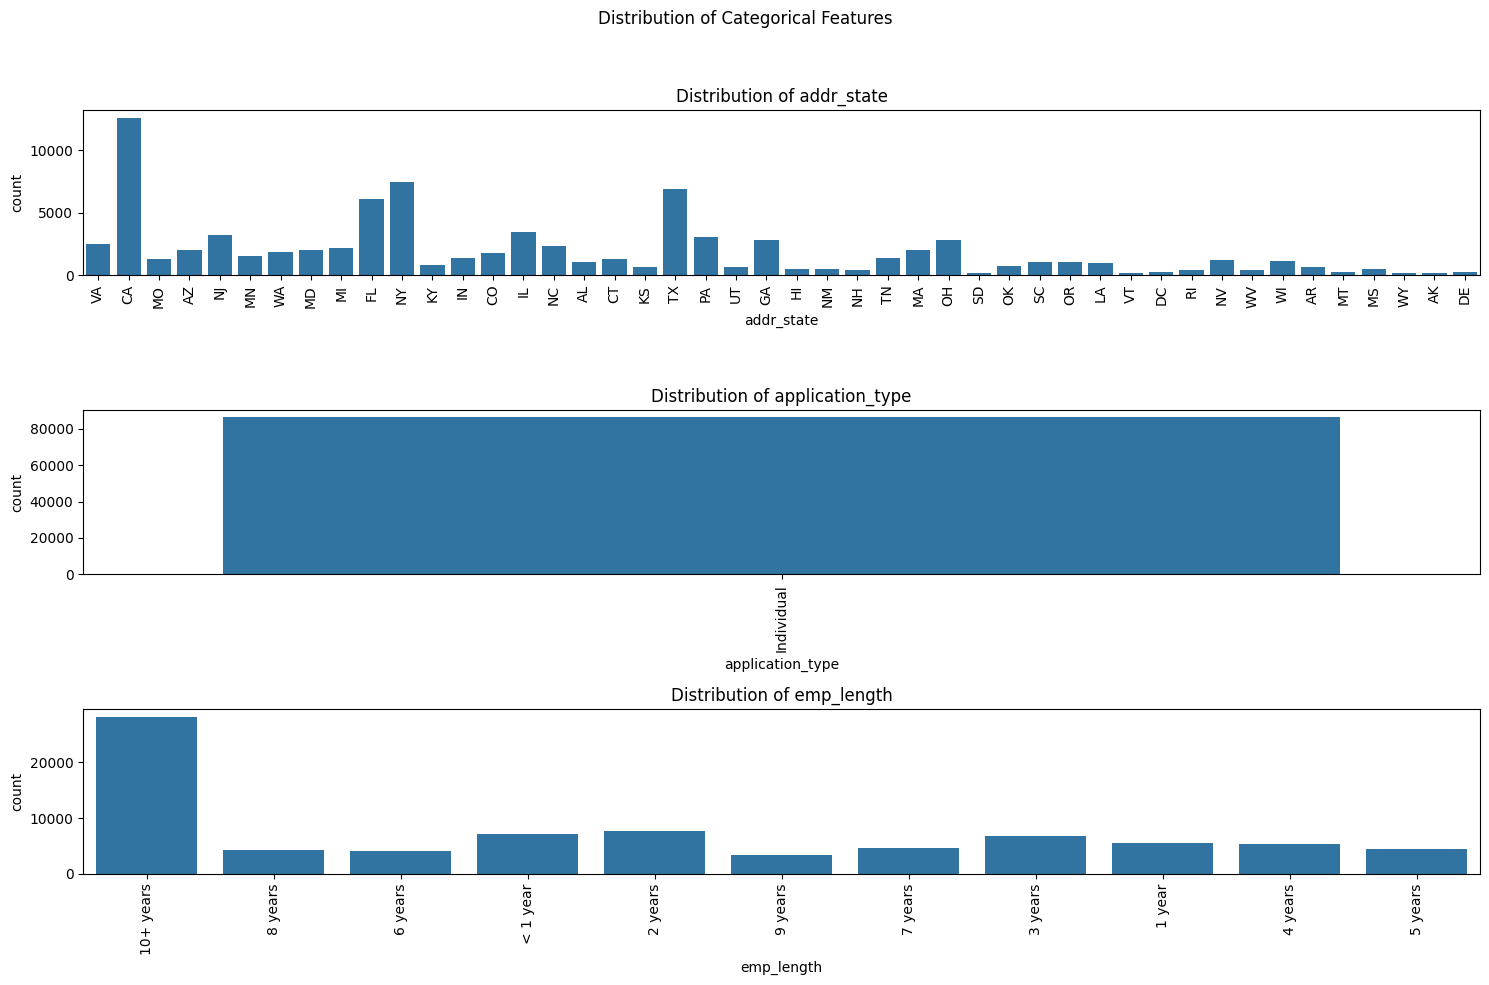

In [32]:
categorical_features = dataset_fully_paid_or_charged_off_cleaned.select_dtypes(exclude=['float64', 'int64'])
categorical_features = categorical_features.drop(columns=['earliest_cr_line'], axis=1)

fig, axes = plt.subplots(3, 1, figsize=(15, 10))
fig.suptitle('Distribution of Categorical Features')

for ax, col in zip(axes.flatten(), categorical_features):
    sns.countplot(data=dataset_fully_paid_or_charged_off_cleaned, x=col, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

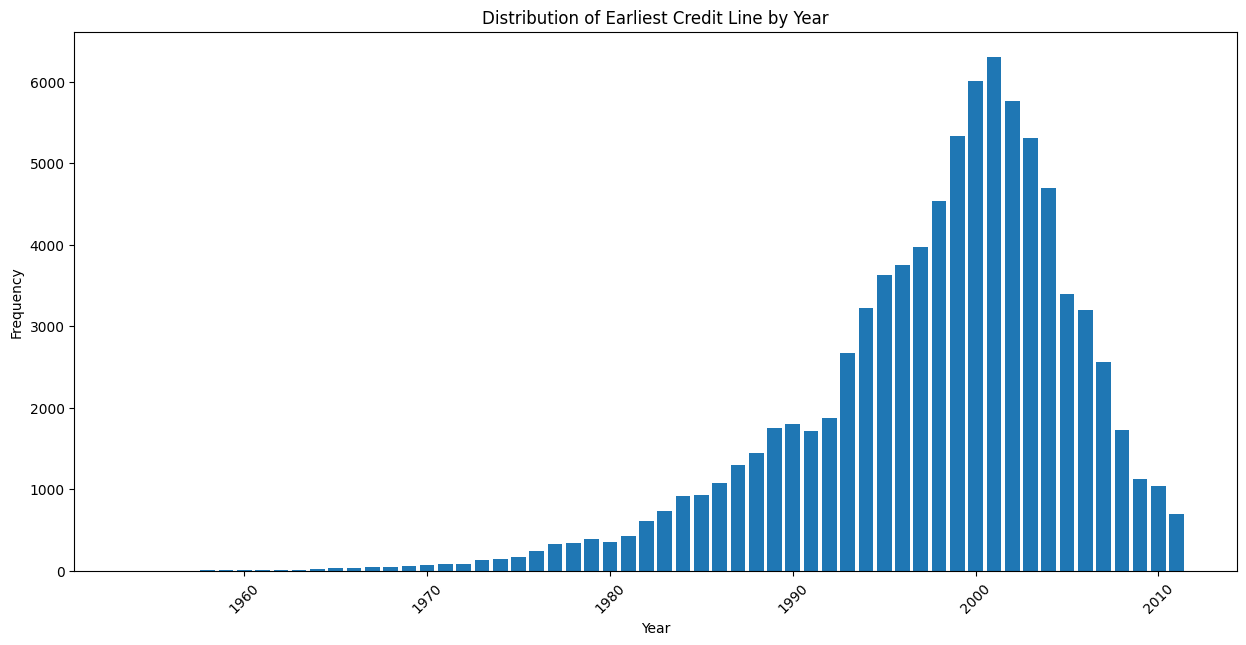

In [33]:
earliest_cr_line = pd.to_datetime(dataset_fully_paid_or_charged_off_cleaned['earliest_cr_line'], format='%b-%Y', errors='coerce')
year_counts = earliest_cr_line.dt.year.value_counts().sort_index()

plt.figure(figsize=(15, 7))
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Earliest Credit Line by Year')
plt.xticks(rotation=45)
plt.show()

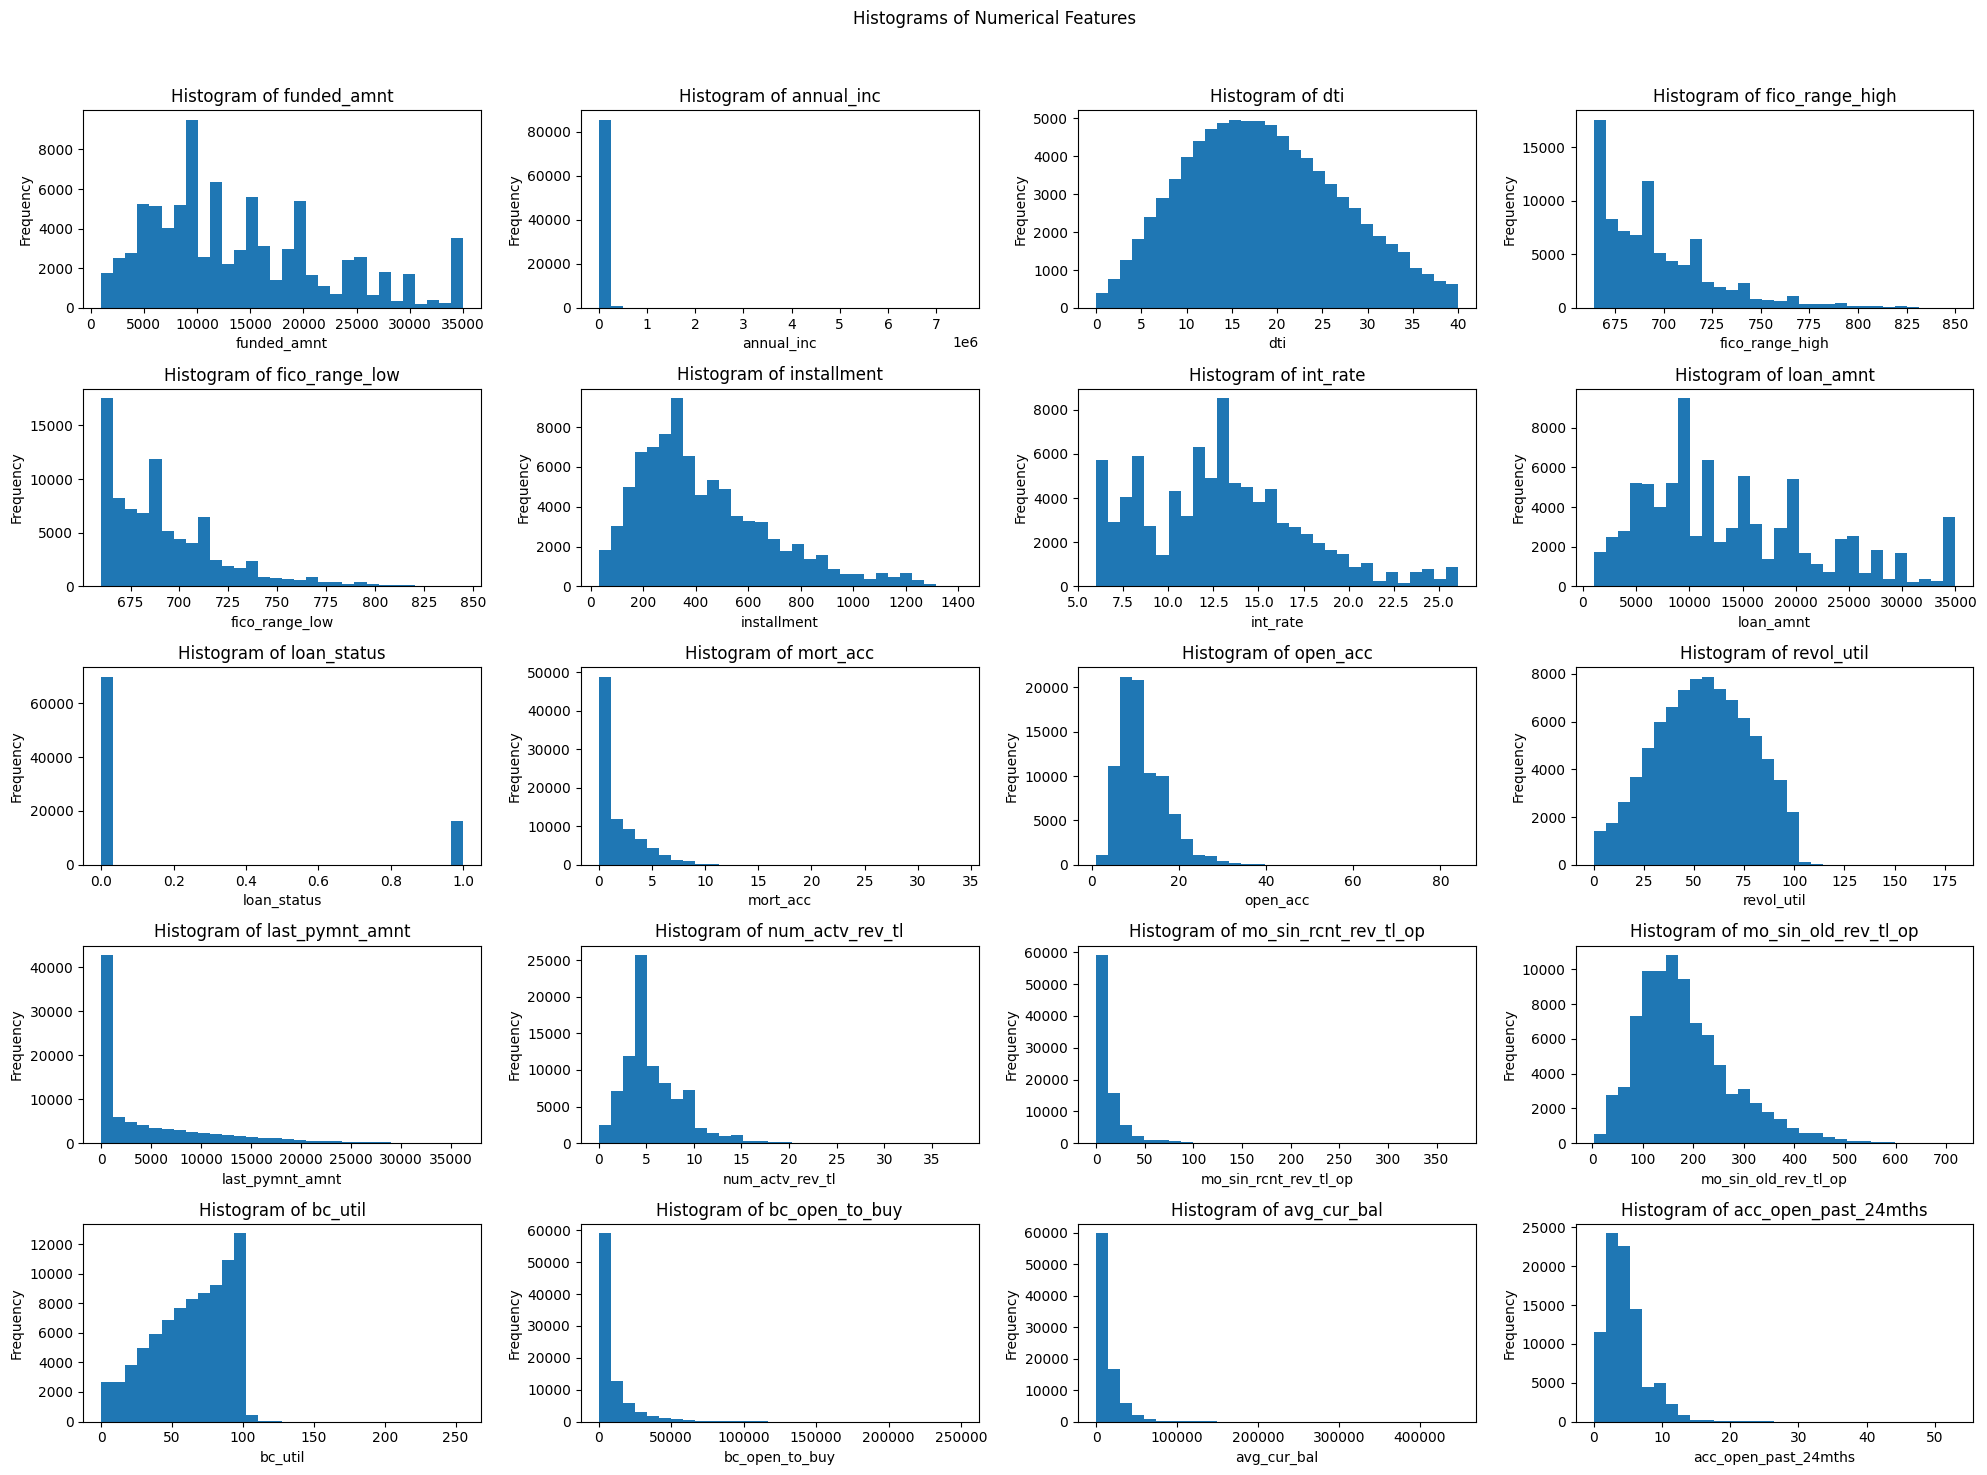

In [ ]:
numerical_features = dataset_fully_paid_or_charged_off_cleaned.select_dtypes(include=['float64', 'int64'])
num_plots = len(numerical_features.columns)
cols = 4
rows = (num_plots + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
fig.suptitle('Histograms of Numerical Features')

for ax, col in zip(axes.flatten(), numerical_features):
    ax.hist(dataset_fully_paid_or_charged_off_cleaned[col].dropna(), bins=30)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

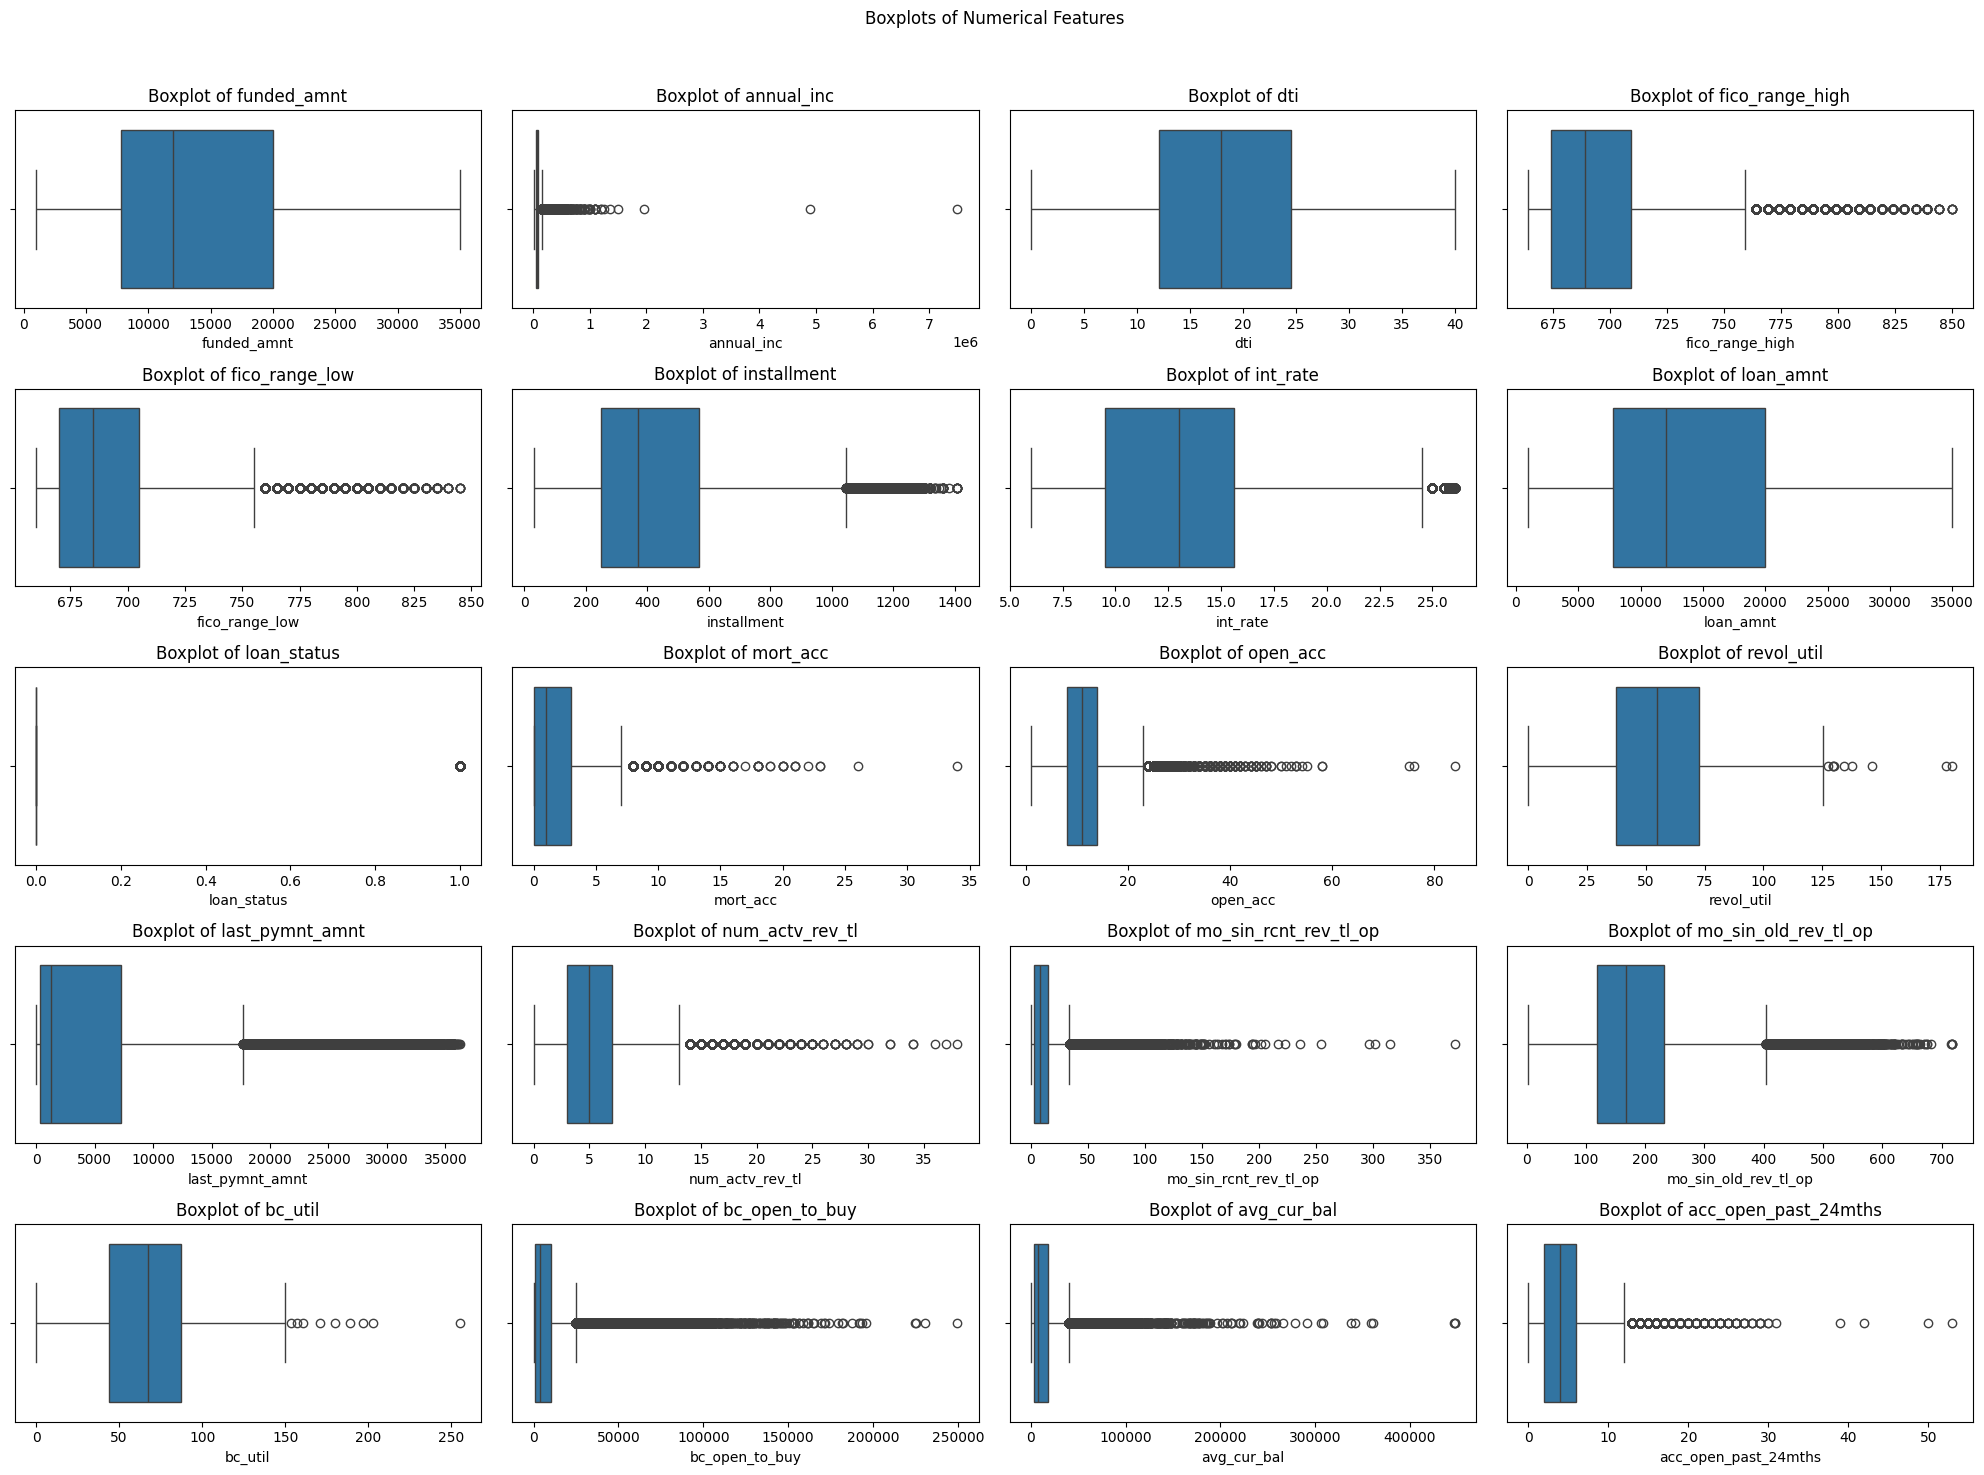

In [33]:
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
fig.suptitle('Boxplots of Numerical Features')

for ax, col in zip(axes.flatten(), numerical_features):
    sns.boxplot(data=dataset_fully_paid_or_charged_off_cleaned, x=col, ax=ax)
    ax.set_title(f'Boxplot of {col}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

(86138, 20)


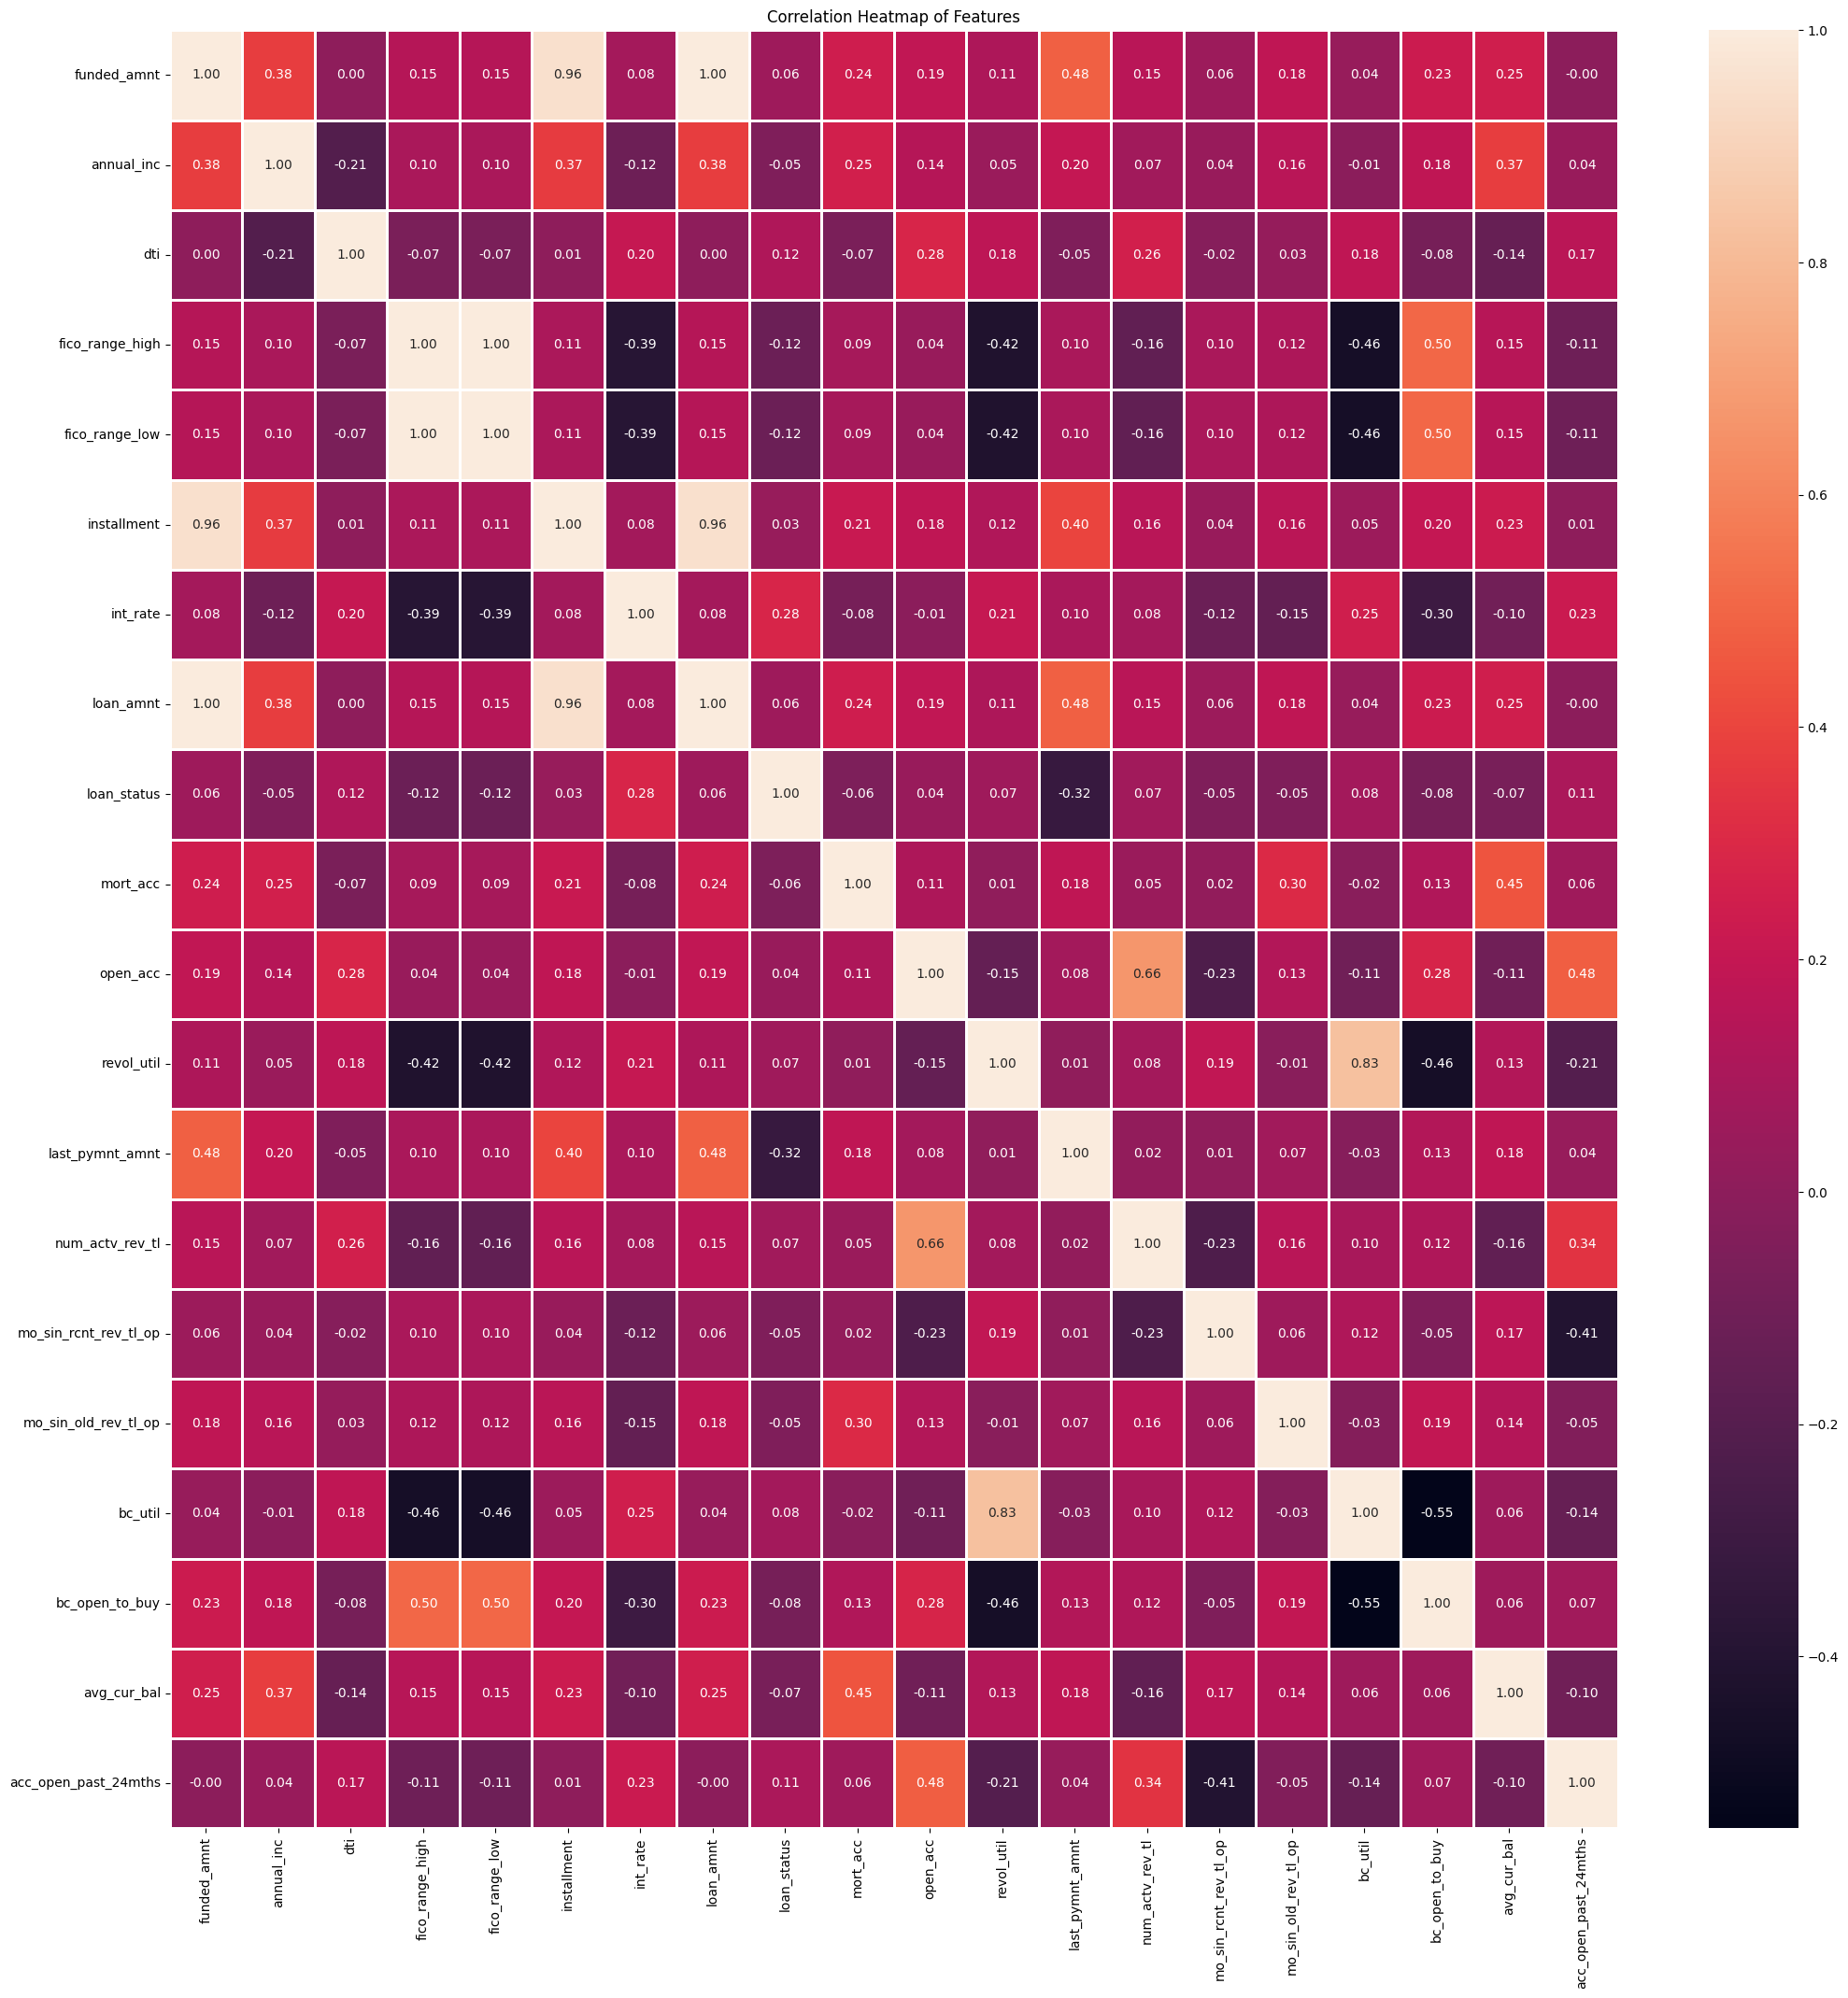

In [ ]:
print(numerical_features.shape)
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.8, cbar=True, fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

<a id='3.1'></a>
## 4.1 Feature Analysis and Exploration

<a id='3.1.1'></a>
### 4.1.1. Analysing the categorical features

### List the categorical features and take a decision on what to do with them - drop them or process them. Explain your decisions.

In [31]:
categorical_features = dataset_fully_paid_or_charged_off_cleaned.select_dtypes(exclude=['float64', 'int64'])
observations_per_column = categorical_features.count()

print("Number of observations per column:")
print(observations_per_column)

Number of observations per column:
addr_state             86138
application_type       86138
earliest_cr_line       86138
emp_length             81421
emp_title              81416
grade                  86138
home_ownership         86138
initial_list_status    86138
purpose                86138
sub_grade              86138
term                   86138
title                  86138
verification_status    86138
zip_code               86138
dtype: int64


#### First of all, we only have missing values among 'emp_length' and 'emp_title', without further analysis (NaNs for instance).

In [32]:
# Dictionary to store unique values per column
unique_values = {col: categorical_features[col].unique().tolist()[:10] for col in categorical_features.columns}

# Display the unique values for each column
for col, values in unique_values.items():
    print(f"{col}: {values}")

addr_state: ['VA', 'CA', 'MO', 'AZ', 'NJ', 'MN', 'WA', 'MD', 'MI', 'FL']
application_type: ['Individual']
earliest_cr_line: ['Aug-1994', 'Sep-1989', 'Aug-2003', 'Aug-2002', 'Nov-1992', 'Oct-2001', 'Nov-2003', 'Oct-1998', 'May-2009', 'Jul-2003']
emp_length: ['10+ years', '8 years', '6 years', '< 1 year', '2 years', '9 years', '7 years', '3 years', '1 year', nan]
emp_title: ['MANAGEMENT', 'Truck Driver Delivery Personel', 'Programming Analysis Supervisor', 'Technical Specialist', 'Admin Specialist', 'Manufacturing Engineer', 'Foreign Service Officer', 'Teacher', 'Store Manager', 'Investment Consultant']
grade: ['C', 'A', 'D', 'B', 'E', 'F', 'G']
home_ownership: ['RENT', 'MORTGAGE', 'OWN', 'ANY']
initial_list_status: ['w', 'f']
purpose: ['debt_consolidation', 'credit_card', 'home_improvement', 'house', 'medical', 'other', 'car', 'major_purchase', 'moving', 'small_business']
sub_grade: ['C1', 'A3', 'D1', 'C3', 'B5', 'B4', 'C4', 'D5', 'B3', 'C5']
term: [' 60 months', ' 36 months']
title: ['

##### We only have 1 value for 'application_type' so we drop it because it has no informational value.
##### 'term' and 'initial_list_status' have 2 unique values, 'verification_status' has 3 values, so one hot encoding is possible for these features.
##### For the zip codes, we are going to group every one of them according to the first number of their zip code. For instance, '414xx' will become '4'. 
##### Why? Because zip codes are grouped by region in the USA (https://en.wikipedia.org/wiki/ZIP_Code#Geographic_hierarchy) and we think zip-code could have importance. So, we do a label encoding by ourselves using the first number of the zip-code as category.
##### 'purpose'/'title' and 'grade'/'subgrade' are similar, we will analyse the amount of missing data (if any) and choose between (1) keeping the two, (2) keeping one out of the two or (3) dropping the two.

In [33]:
dataset_fully_paid_or_charged_off_cleaned.drop(['application_type', 'emp_title', 'title'], axis=1, inplace=True)
dataset_fully_paid_or_charged_off_cleaned['zip_code'] = dataset_fully_paid_or_charged_off_cleaned['zip_code'].str[:1]
dataset_fully_paid_or_charged_off_cleaned['earliest_cr_line'] = dataset_fully_paid_or_charged_off_cleaned['earliest_cr_line'].apply(lambda s: int(str(s)[-4:]))

dataset_fully_paid_or_charged_off_cleaned.head()

,funded_amnt,addr_state,annual_inc,dti,earliest_cr_line,emp_length,fico_range_high,fico_range_low,grade,home_ownership,...,verification_status,zip_code,last_pymnt_amnt,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths
0,15000.0,VA,78000.0,12.03,1994,10+ years,754.0,750.0,C,RENT,...,Source Verified,2,12017.81,4.0,1.0,244.0,4.7,9525.0,29828.0,5.0
1,10400.0,CA,58000.0,14.92,1989,8 years,714.0,710.0,A,MORTGAGE,...,Not Verified,9,321.08,9.0,1.0,290.0,41.5,7599.0,9536.0,7.0
2,21425.0,MO,63800.0,18.49,2003,6 years,689.0,685.0,D,RENT,...,Source Verified,6,17813.19,4.0,7.0,136.0,97.8,324.0,4232.0,4.0
3,7650.0,AZ,50000.0,34.81,2002,< 1 year,689.0,685.0,C,RENT,...,Source Verified,8,17.70,4.0,8.0,148.0,93.2,332.0,5857.0,6.0
4,9600.0,NJ,69000.0,25.81,1992,10+ years,684.0,680.0,C,RENT,...,Source Verified,0,9338.58,7.0,23.0,265.0,69.2,6494.0,3214.0,8.0


### Convert Term to a numerical feature

In [34]:
dataset_fully_paid_or_charged_off_cleaned['term'] = dataset_fully_paid_or_charged_off_cleaned['term'].str.extract(r'(\d+)').astype(int)

### Decide if you want to do anything to emp_length
###
##### We think 'emp_length' is good to keep because it seems interesting from a loan perspective. We have to take the assumption that 10 or more years of employment length is equal to 10 years, and that less than 1 year of employment length is equal to 0. We have NaN values that we will handle later in the notebook.

In [35]:
# Define a mapping for the conversion
mapping = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 8,
    '5 years': 8,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

# Apply the mapping
dataset_fully_paid_or_charged_off_cleaned['emp_length'] = dataset_fully_paid_or_charged_off_cleaned['emp_length'].replace(mapping)
print(dataset_fully_paid_or_charged_off_cleaned['emp_length'].value_counts(dropna=False))

emp_length
10.0    28177
8.0     14093
2.0      7699
0.0      7060
3.0      6784
1.0      5482
NaN      4717
7.0      4582
6.0      4103
9.0      3441
Name: count, dtype: int64


### Is sub_grade worth keeping ?

In [36]:
dataset_fully_paid_or_charged_off_cleaned['sub_grade'] = pd.Categorical(
    dataset_fully_paid_or_charged_off_cleaned['sub_grade'],
    ordered=True
)

contingency_table = pd.crosstab(dataset_fully_paid_or_charged_off_cleaned['sub_grade'], dataset_fully_paid_or_charged_off_cleaned['loan_status'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}, p-value: {p}")

Chi-square statistic: 7050.656134584802, p-value: 0.0


In [37]:
missing_percentage = dataset_fully_paid_or_charged_off_cleaned['sub_grade'].isnull().mean() * 100
print(missing_percentage)

0.0


##### The Chi-square test is statistically significant. Thus we can use this feature. Also, there are no missing data. The only thing that would make us not choose it is its similarity with the 'grade' feature, but the level of depth the 'sub_grade' feature adds might be interesting for our analysis. <br> So we decided to keep it.

<a id='3.1.2'></a>
### 4.1.2. Analysing the continuous features

### Do you want to do anything to Annual Income ?

#### Feature : Annual Income

In [38]:
print(dataset_fully_paid_or_charged_off_cleaned['annual_inc'].describe())

count    8.613800e+04
mean     7.384311e+04
std      5.929352e+04
min      4.000000e+03
25%      4.500000e+04
50%      6.247372e+04
75%      9.000000e+04
max      7.500000e+06
Name: annual_inc, dtype: float64


##### We have a big difference between the mean/median value compared to the maximum value, indicating a presence of outliers, let's have a look at them on a graph:

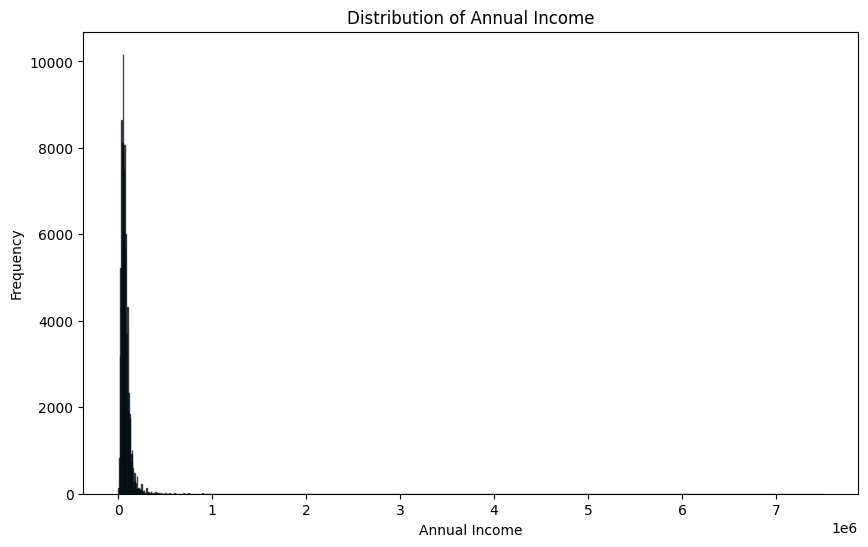

In [39]:
plt.figure(figsize=(10, 6))

plt.hist(dataset_fully_paid_or_charged_off_cleaned['annual_inc'].dropna(), bins=1000, edgecolor='k', alpha=0.7)

plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')

plt.show()

##### We remove the observations where annual_inc is superior to 250,000 and apply a log function to annual_inc :

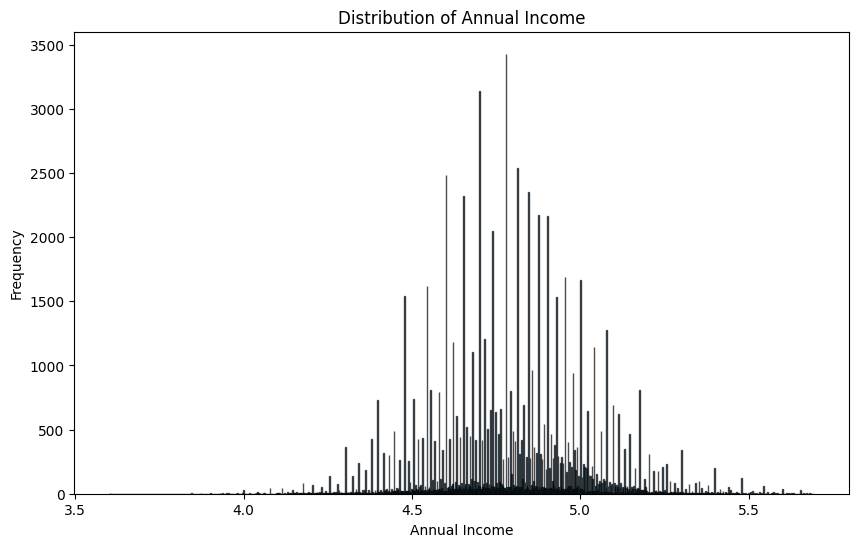

In [40]:
dataset_fully_paid_or_charged_off_cleaned = dataset_fully_paid_or_charged_off_cleaned[dataset_fully_paid_or_charged_off_cleaned['annual_inc'] < 500000]
dataset_fully_paid_or_charged_off_cleaned['log_annual_inc'] = dataset_fully_paid_or_charged_off_cleaned['annual_inc'].apply(lambda x: np.log10(x+1))
dataset_fully_paid_or_charged_off_cleaned.drop(columns=['annual_inc'], axis=1, inplace=True)

plt.figure(figsize=(10, 6))

plt.hist(dataset_fully_paid_or_charged_off_cleaned['log_annual_inc'].dropna(), bins=1000, edgecolor='k', alpha=0.7)

plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')

plt.show()

### How do you want to treat the two FICO scores ?
###
##### The two FICO scores have a perfect correlation of 1.0 against each other, and 0.15 against the target variable. Also, the difference between the two is consistently equal to 4 or 5. We can then generate a new feature "fico_score_mean" that would take the mean between the high and low FICO scores, and drop the min and max FICO scores altogether.

In [41]:
dataset_fully_paid_or_charged_off_cleaned['fico_score_mean'] = (dataset_fully_paid_or_charged_off_cleaned['fico_range_high'] + dataset_fully_paid_or_charged_off_cleaned['fico_range_low'])/2

dataset_fully_paid_or_charged_off_cleaned.drop(columns=['fico_range_high', 'fico_range_low'], inplace=True)

In [42]:
dataset_fully_paid_or_charged_off_cleaned['fico_score_mean']

0        752.0
1        712.0
2        687.0
3        687.0
4        682.0
         ...  
86133    702.0
86134    707.0
86135    692.0
86136    662.0
86137    732.0
Name: fico_score_mean, Length: 86015, dtype: float64

##### There is a perfect correlation between loan_amount and funded_amount so we need to decide which one to keep in order to reduce redundancy and multicollinearity. As both have no missing values anymore, we will drop funded_amount.

In [43]:
dataset_fully_paid_or_charged_off_cleaned.drop(columns=['funded_amnt'], inplace=True)

print("\nUpdated dataset columns:")
print(dataset_fully_paid_or_charged_off_cleaned.columns)
print(dataset_fully_paid_or_charged_off_cleaned.shape)


Updated dataset columns:
Index(['addr_state', 'dti', 'earliest_cr_line', 'emp_length', 'grade',
       'home_ownership', 'initial_list_status', 'installment', 'int_rate',
       'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 'purpose',
       'revol_util', 'sub_grade', 'term', 'verification_status', 'zip_code',
       'last_pymnt_amnt', 'num_actv_rev_tl', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_old_rev_tl_op', 'bc_util', 'bc_open_to_buy', 'avg_cur_bal',
       'acc_open_past_24mths', 'log_annual_inc', 'fico_score_mean'],
      dtype='object')
(86015, 29)


<a id='3.2'></a>
## 4.2. Encoding Categorical Data

### Decide how to handle the categorical data in columns ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status', 'application_type']

### You may wish to use a LabelEncoder
###
##### We already dropped 'application_type' earlier because it only has one value.


In [44]:
label_encoder = LabelEncoder()
columns_to_encode = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status']

for column in columns_to_encode:
    dataset_fully_paid_or_charged_off_cleaned[column] = label_encoder.fit_transform(dataset_fully_paid_or_charged_off_cleaned[column])

dataset_fully_paid_or_charged_off_cleaned

,addr_state,dti,earliest_cr_line,emp_length,grade,home_ownership,initial_list_status,installment,int_rate,loan_amnt,...,last_pymnt_amnt,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,log_annual_inc,fico_score_mean
0,40,12.03,1994,10.0,2,3,1,336.64,12.39,15000.0,...,12017.81,4.0,1.0,244.0,4.7,9525.0,29828.0,5.0,4.892100,752.0
1,4,14.92,1989,8.0,0,1,1,321.08,6.99,10400.0,...,321.08,9.0,1.0,290.0,41.5,7599.0,9536.0,7.0,4.763435,712.0
2,21,18.49,2003,6.0,3,3,1,516.36,15.59,21425.0,...,17813.19,4.0,7.0,136.0,97.8,324.0,4232.0,4.0,4.804827,687.0
3,3,34.81,2002,0.0,2,3,0,260.20,13.66,7650.0,...,17.70,4.0,8.0,148.0,93.2,332.0,5857.0,6.0,4.698979,687.0
4,26,25.81,1992,10.0,2,3,0,326.53,13.66,9600.0,...,9338.58,7.0,23.0,265.0,69.2,6494.0,3214.0,8.0,4.838855,682.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86133,2,10.43,1984,10.0,1,1,0,485.07,10.15,15000.0,...,10584.91,5.0,3.0,356.0,31.3,28091.0,14311.0,5.0,4.924987,702.0
86134,12,7.78,1990,2.0,1,1,1,267.79,9.17,8400.0,...,267.50,2.0,5.0,287.0,77.2,2505.0,25364.0,2.0,4.959046,707.0
86135,27,15.25,2001,3.0,2,3,0,336.90,12.99,10000.0,...,5594.78,5.0,5.0,158.0,42.5,13974.0,4219.0,3.0,4.725373,692.0
86136,21,17.61,2000,10.0,5,3,0,336.92,24.99,8475.0,...,336.92,3.0,7.0,164.0,88.0,324.0,3125.0,8.0,4.716012,662.0


<a id='3.4'></a>
## 4.3. Sampling Data

### To create a balanced dataset, draw 5500 rows at random from each of the two classes and combine them into a new dataframe.

In [45]:
class_0 = dataset_fully_paid_or_charged_off_cleaned[dataset_fully_paid_or_charged_off_cleaned['loan_status'] == 0]
class_1 = dataset_fully_paid_or_charged_off_cleaned[dataset_fully_paid_or_charged_off_cleaned['loan_status'] == 1]

sample_class_0 = class_0.sample(n=5500, random_state=4294967295)
sample_class_1 = class_1.sample(n=5500, random_state=4294967295)

dataset_fully_paid_or_charged_off_cleaned_balanced = pd.concat([sample_class_0, sample_class_1]).reset_index(drop=True)

print("Columns in the balanced dataset:")
print(", ".join(dataset_fully_paid_or_charged_off_cleaned_balanced.columns))

print("\nClass Distribution in Balanced Dataset:")
print(dataset_fully_paid_or_charged_off_cleaned_balanced['loan_status'].value_counts().to_frame().rename(columns={'loan_status': 'Count'}))

Columns in the balanced dataset:
addr_state, dti, earliest_cr_line, emp_length, grade, home_ownership, initial_list_status, installment, int_rate, loan_amnt, loan_status, mort_acc, open_acc, purpose, revol_util, sub_grade, term, verification_status, zip_code, last_pymnt_amnt, num_actv_rev_tl, mo_sin_rcnt_rev_tl_op, mo_sin_old_rev_tl_op, bc_util, bc_open_to_buy, avg_cur_bal, acc_open_past_24mths, log_annual_inc, fico_score_mean

Class Distribution in Balanced Dataset:
             count
loan_status       
0             5500
1             5500


### Choose a method to handle any NAs that may be in a column.
###
##### We replace potential NaNs with each column mean.

In [46]:
dataset_fully_paid_or_charged_off_cleaned_balanced = dataset_fully_paid_or_charged_off_cleaned_balanced.apply(pd.to_numeric, errors='coerce')
dataset_fully_paid_or_charged_off_cleaned_balanced = dataset_fully_paid_or_charged_off_cleaned_balanced.fillna(dataset_fully_paid_or_charged_off_cleaned_balanced.mean())

dataset_fully_paid_or_charged_off_cleaned_balanced.head(10)

,addr_state,dti,earliest_cr_line,emp_length,grade,home_ownership,initial_list_status,installment,int_rate,loan_amnt,...,last_pymnt_amnt,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,log_annual_inc,fico_score_mean
0,4,10.25,2003,8.0,2,2,0,550.66,14.49,16000.0,...,2202.76,11.0,12.0,119.0,59.2,1793.0,2405.0,15.0,5.079185,697.0
1,12,24.28,2009,6.0,3,3,0,419.58,15.61,12000.0,...,284.90,4.0,5.0,62.0,77.9,1968.0,3641.0,7.0,4.544080,702.0
2,29,10.56,1983,10.0,2,3,0,410.02,13.98,12000.0,...,409.80,12.0,9.0,376.0,89.7,2823.0,6673.0,4.0,5.336462,662.0
3,10,17.47,2002,10.0,2,1,0,823.89,14.31,24000.0,...,4842.27,14.0,1.0,155.0,60.1,9824.0,14680.0,6.0,5.079185,677.0
4,30,36.05,1991,10.0,3,1,1,338.01,16.29,9575.0,...,457.41,3.0,6.0,278.0,26.2,5681.0,4005.0,7.0,4.380229,667.0
5,40,21.46,1992,9.0,3,2,1,810.15,15.61,33600.0,...,20184.78,7.0,13.0,268.0,64.9,19355.0,5702.0,7.0,5.079185,697.0
6,38,27.15,2004,2.0,3,3,0,333.10,18.24,13050.0,...,237.05,7.0,2.0,73.0,42.4,8407.0,1274.0,6.0,4.462413,697.0
7,5,33.77,2000,6.0,1,1,0,330.57,11.67,10000.0,...,986.80,8.0,3.0,173.0,92.0,1043.0,3697.0,2.0,4.556315,672.0
8,10,22.47,1997,10.0,2,1,1,310.51,14.49,13200.0,...,8737.31,3.0,9.0,213.0,56.2,5261.0,18050.0,6.0,4.787113,682.0
9,26,14.40,1989,10.0,0,1,1,265.15,7.69,8500.0,...,264.96,6.0,26.0,305.0,81.5,1481.0,10383.0,2.0,4.857339,772.0


<a id='4'></a>
# 5. Evaluate Algorithms and Models

<a id='4.1'></a>
## 5.1. Train Test Split

### Use an 80:20 split

In [47]:
y = dataset_fully_paid_or_charged_off_cleaned_balanced['loan_status']
X = dataset_fully_paid_or_charged_off_cleaned_balanced.drop(columns=['loan_status'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4294967295)

In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<a id='4.2'></a>
## 5.2. Test Options and Evaluation Metrics


### Use K-Folds cross validation with 10 folds and 'roc-auc' as your score.
###
##### We test our setup with the Logistic Regression.

In [49]:
model = LogisticRegression(random_state=4294967295)

In [50]:
# Set up 10-Folds cross-validation with StratifiedKFold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=4294967295)

# Perform cross-validation with 'roc-auc' as the scoring metric
scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='roc_auc')

print("ROC-AUC scores for each fold:", scores)
print("Mean ROC-AUC score:", scores.mean())

ROC-AUC scores for each fold: [0.92034566 0.91777334 0.91903367 0.93187465 0.92188493 0.93001513
 0.90545922 0.93848109 0.93151308 0.92578991]
Mean ROC-AUC score: 0.9242170672369175


<a id='4.3'></a>
## 5.3. Compare Models and Algorithms

### Use a wide range of classification models. I have added them below to a Python list.

In [51]:
# spot check the algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# Neural Network
models.append(('NN', MLPClassifier()))
# Boosting methods
models.append(('AB', AdaBoostClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier()))

# Additional classifying models we thought of
models.append(('Ridge', RidgeClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('PAC', PassiveAggressiveClassifier()))
models.append(('Perceptron', Perceptron()))
models.append(('ETC', ExtraTreeClassifier()))
models.append(('BNB', BernoulliNB()))
models.append(('SVC', SVC()))
models.append(('LinearSVC', LinearSVC()))
models.append(('NuSVC', NuSVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('BC', BaggingClassifier()))
models.append(('ETC', ExtraTreesClassifier()))
models.append(('HGB', HistGradientBoostingClassifier()))
models.append(('Stacking', StackingClassifier(estimators=[('rf', RandomForestClassifier()), ('gbm', GradientBoostingClassifier()), ('ab', AdaBoostClassifier()), ('svc', SVC())])))

### K-folds cross validation

In [52]:
model_names = []
model_scores = []

print("Model Evaluation Results (ROC-AUC):")
print("=" * 40)

for name, model in models:
    scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='roc_auc')
    model_names.extend([name] * len(scores))
    model_scores.extend(scores)
    print(f"{name}:\n  Mean ROC-AUC: {scores.mean():.4f}")
    print(f"  ROC-AUC Scores for each fold: {', '.join([f'{score:.4f}' for score in scores])}\n")

print("=" * 40)

Model Evaluation Results (ROC-AUC):
LR:
  Mean ROC-AUC: 0.9242
  ROC-AUC Scores for each fold: 0.9203, 0.9178, 0.9190, 0.9319, 0.9219, 0.9300, 0.9055, 0.9385, 0.9315, 0.9258

KNN:
  Mean ROC-AUC: 0.8057
  ROC-AUC Scores for each fold: 0.8100, 0.7955, 0.8071, 0.8120, 0.8124, 0.7997, 0.7799, 0.8139, 0.8259, 0.8010

DT:
  Mean ROC-AUC: 0.8080
  ROC-AUC Scores for each fold: 0.7875, 0.7989, 0.7966, 0.8307, 0.8058, 0.8204, 0.7977, 0.8147, 0.8205, 0.8068

NB:
  Mean ROC-AUC: 0.9040
  ROC-AUC Scores for each fold: 0.9086, 0.8882, 0.9069, 0.9132, 0.9036, 0.9046, 0.8837, 0.9169, 0.9114, 0.9028

NN:
  Mean ROC-AUC: 0.9067
  ROC-AUC Scores for each fold: 0.9013, 0.9045, 0.9123, 0.9110, 0.9026, 0.9064, 0.8943, 0.9180, 0.8985, 0.9178

AB:
  Mean ROC-AUC: 0.9333
  ROC-AUC Scores for each fold: 0.9366, 0.9246, 0.9266, 0.9388, 0.9307, 0.9446, 0.9199, 0.9452, 0.9386, 0.9273

RF:
  Mean ROC-AUC: 0.9315
  ROC-AUC Scores for each fold: 0.9297, 0.9199, 0.9278, 0.9396, 0.9328, 0.9449, 0.9162, 0.9384, 0.9359

### Plot a model comparison using a BoxPlot to capture the range of values coming from the K Folds for each model

<Figure size 16000x9000 with 0 Axes>

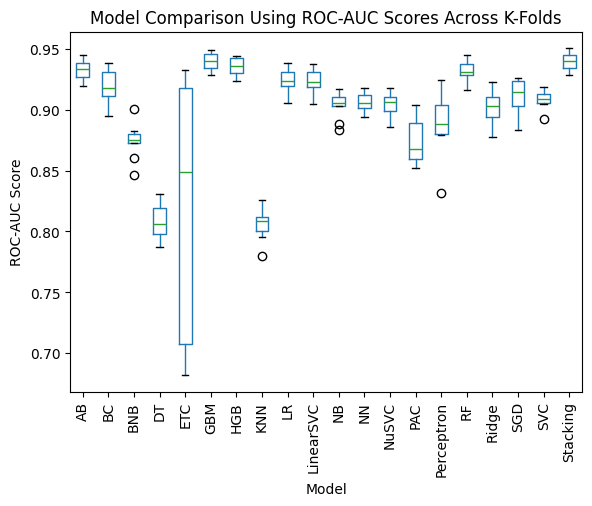

In [53]:
results_df = pd.DataFrame({'Model': model_names, 'ROC-AUC Score': model_scores})

plt.figure(figsize=(160, 90))

results_df.boxplot(column='ROC-AUC Score', by='Model', grid=False)

plt.title("Model Comparison Using ROC-AUC Scores Across K-Folds")
plt.suptitle("")  
plt.xlabel("Model")
plt.ylabel("ROC-AUC Score")
plt.xticks(rotation=90)

plt.show()

<a id='5'></a>
# 6. Model Tuning and Grid Search

### Choose the best model and do some hyperparameter tuning by looping over the hyper parameters of the model to fine-tune the model. Do this using the GridSearch features in Scikit Learn.

In [54]:
# Define the parameter distribution for GridSearchCV
param_grid = {
    'n_estimators': [50, 70, 100, 150, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0, 10.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

model = AdaBoostClassifier(random_state=4294967295)

# Set up GridSearchCV with the ROC-AUC scoring metric
GridSearchCV = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=kf,
    n_jobs=-1,
    verbose=2,
)

# Fit the GridSearchCV to the training data
GridSearchCV.fit(X_train_scaled, y_train)

print("Best Parameters:", GridSearchCV.best_params_)
print("Best ROC-AUC Score:", GridSearchCV.best_score_)

best_adaboost = GridSearchCV.best_estimator_

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 70}
Best ROC-AUC Score: 0.9357049881456


In [55]:
param_distributions = {
    'n_estimators': [50, 70, 100, 150, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

additional_model = GradientBoostingClassifier(random_state=4294967295)

# Set up RandomizedSearchCV with the ROC-AUC scoring metric
random_search = RandomizedSearchCV(
    estimator=additional_model,
    param_distributions=param_distributions,
    scoring='roc_auc',
    cv=kf,
    n_jobs=-1,
    verbose=2
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_scaled, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best ROC-AUC Score:", random_search.best_score_)

best_gradient_boosting = random_search.best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 70, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 5, 'learning_rate': 0.1}
Best ROC-AUC Score: 0.9402259309190646


#### After running RandomizedSearchCV multiple times on the GBM model, we get these results:
#### Best Parameters: {'subsample': 0.8, 'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 3, 'learning_rate': 0.1}
#### Best ROC-AUC Score = 0.94094
####
#### We cannot use GridSearchCV on the GBM model because we would have to make 20,250 fits, which would, with the best PC we have, take approximately 7-8 hours to run.

#### So Grandient Boosting is the best model we found for this dataset without feature engineering.

<a id='6'></a>
# 7. Finalise the Model

### Finalize Model with best parameters found during tuning step.

In [56]:
final_model = GradientBoostingClassifier(random_state=4294967295, subsample=0.8, n_estimators=150, min_samples_split=5, min_samples_leaf=2, max_depth=3, learning_rate=0.1)

<a id='6.1'></a>
## 7.1. Results on the Test Dataset

### Calculate the fine-tuned model results on the test dataset. Calculate accuracy, confusion matrix, the classification report. Discuss results.

In [57]:
final_model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(min_samples_leaf=2, min_samples_split=5,
                           n_estimators=150, random_state=4294967295,
                           subsample=0.8)

In [58]:
y_pred = final_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8495454545454545


In [59]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[891 219]
 [112 978]]


In [60]:
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84      1110
           1       0.82      0.90      0.86      1090

    accuracy                           0.85      2200
   macro avg       0.85      0.85      0.85      2200
weighted avg       0.85      0.85      0.85      2200



### Calculate the ROC curve for the model and its AUC

In [61]:
# Perform cross-validation with 'roc-auc' as the scoring metric
final_scores = cross_val_score(final_model, X_train_scaled, y_train, cv=kf, scoring='roc_auc')

# Display the ROC-AUC scores for each fold and the mean score
print("ROC-AUC scores for each fold:", final_scores)
print("Mean ROC-AUC score:", final_scores.mean())

ROC-AUC scores for each fold: [0.93597074 0.93053683 0.93527343 0.9465958  0.9398499  0.95340368
 0.93065047 0.94845015 0.94601212 0.93727757]
Mean ROC-AUC score: 0.9404020681925009


AUC score: 0.9396751797669228


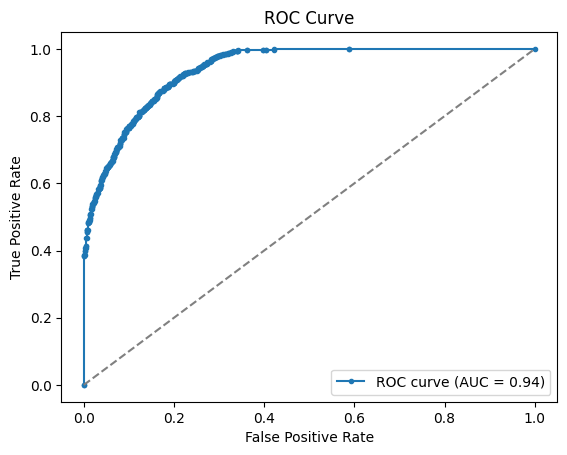

In [62]:
y_prob = final_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
auc_score = roc_auc_score(y_test, y_prob)
print("AUC score:", auc_score)

plt.figure()

plt.plot(fpr, tpr, marker='.', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # line for random chance

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.show()

<a id='6.2'></a>
## 7.2. Variable Intuition/Feature Importance
Looking at the details above GBM might be worthy of further study.
Let us look into the Feature Importance of the GBM model

### Examine the importance of each of the model features. Some models may have a features_importances property. For others you may need to loop over features and exclude/include them to determine their impact on the score.

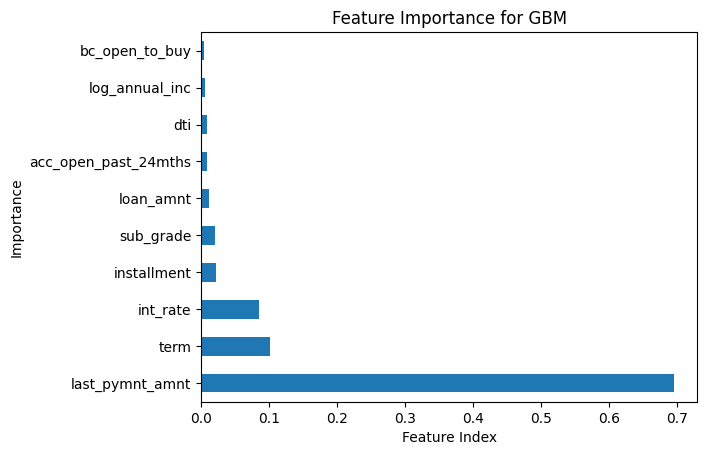

In [63]:
feat_importances = pd.Series(final_model.feature_importances_, index=X.columns)

feat_importances.nlargest(10).plot(kind='barh')

plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title(f'Feature Importance for GBM')

plt.show()

# My Suggestions

This is where you can put your extra analysis work. Try to keep it to one main idea. This will help your coursework grade, especially if makes the model work better ;-)

##### We decide to do feature engineering to improve the model.
#####
##### Here are the features we implemented and their characteristics:
##### 1. Overall Credit Utilization (`overall_credit_utilization`)
##### - Definition: Average utilization rate across all revolving and bankcard accounts.
##### - Calculation: `(revol_util + bc_util) / 2`, where:
##### - `revol_util`: Revolving line utilization rate.
##### - `bc_util`: Bankcard utilization rate.
##### - Purpose: It provides a consolidated view of credit utilization, offering a more comprehensive understanding of the borrower's debt usage. High utilization can signal financial stress, while lower values suggest responsible credit management.
##### 2. Payment to Loan Ratio (`payment_to_loan_ratio`)
##### - Definition: Ratio of the latest payment amount to the original loan amount.
##### - Calculation: `last_pymnt_amnt / loan_amnt`, where:
##### - `last_pymnt_amnt`: Last payment amount made by the borrower.
##### - `loan_amnt`: Original loan amount.
##### - Purpose: It assesses the borrower’s repayment effort relative to the loan size. A high ratio may indicate proactive debt reduction, while a low ratio could imply potential repayment difficulties.
##### 3. State Risk (`state_risk`)
##### - Definition: Average loan default rate for each state.
##### - Calculation: Each state is mapped to its average default rate based on historical data.
##### - Purpose: It captures geographic risk factors by incorporating state-level economic influences. Some states have higher default rates, which can provide predictive insight into location-based risk.
##### 4. Revolving Account Span (`revolving_account_span`)
##### - Definition: Time span of the borrower’s revolving account activity.
##### - Calculation: `mo_sin_old_rev_tl_op - mo_sin_rcnt_rev_tl_op`, where:
##### - `mo_sin_old_rev_tl_op`: Months since the oldest revolving trade line.
##### - `mo_sin_rcnt_rev_tl_op`: Months since the most recent revolving trade line.
##### - Purpose: It helps assess the borrower’s credit activity over time, with a longer span possibly indicating stable account management, while shorter spans may suggest recent credit line usage.
##### 5. Average Balance per Account (`avg_bal_per_account`)
##### - Definition: Average balance per open account.
##### - Calculation: `avg_cur_bal / (open_acc + 1)`, where:
##### - `avg_cur_bal`: Average current balance across accounts.
##### - `open_acc`: Number of open accounts.
##### - `+1` is added to avoid division by zero.
##### - Purpose: It reflects the borrower's average debt load per account, indicating financial spread and stability. Lower values may suggest responsible debt management, while higher values could indicate over-leverage.

In [64]:
dataset_fully_paid_or_charged_off_cleaned_balanced['overall_credit_utilization'] = (dataset_fully_paid_or_charged_off_cleaned_balanced['revol_util'] + dataset_fully_paid_or_charged_off_cleaned_balanced['bc_util']) / 2

dataset_fully_paid_or_charged_off_cleaned_balanced['payment_to_loan_ratio'] = dataset_fully_paid_or_charged_off_cleaned_balanced['last_pymnt_amnt'] / dataset_fully_paid_or_charged_off_cleaned_balanced['loan_amnt']

state_default_rate = dataset_fully_paid_or_charged_off_cleaned_balanced.groupby('addr_state')['loan_status'].mean()
dataset_fully_paid_or_charged_off_cleaned_balanced['state_risk'] = dataset_fully_paid_or_charged_off_cleaned_balanced['addr_state'].map(state_default_rate)

dataset_fully_paid_or_charged_off_cleaned_balanced['revolving_account_span'] = dataset_fully_paid_or_charged_off_cleaned_balanced['mo_sin_old_rev_tl_op'] - dataset_fully_paid_or_charged_off_cleaned_balanced['mo_sin_rcnt_rev_tl_op']

dataset_fully_paid_or_charged_off_cleaned_balanced['avg_bal_per_account'] = dataset_fully_paid_or_charged_off_cleaned_balanced['avg_cur_bal'] / (dataset_fully_paid_or_charged_off_cleaned_balanced['open_acc'] + 1)  # +1 to avoid division by zero

dataset_fully_paid_or_charged_off_cleaned_balanced

,addr_state,dti,earliest_cr_line,emp_length,grade,home_ownership,initial_list_status,installment,int_rate,loan_amnt,...,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,log_annual_inc,fico_score_mean,overall_credit_utilization,payment_to_loan_ratio,state_risk,revolving_account_span,avg_bal_per_account
0,4,10.25,2003,8.000000,2,2,0,550.66,14.49,16000.0,...,1793.0,2405.0,15.0,5.079185,697.0,55.40,0.137673,0.500000,107.0,141.470588
1,12,24.28,2009,6.000000,3,3,0,419.58,15.61,12000.0,...,1968.0,3641.0,7.0,4.544080,702.0,56.30,0.023742,0.467290,57.0,364.100000
2,29,10.56,1983,10.000000,2,3,0,410.02,13.98,12000.0,...,2823.0,6673.0,4.0,5.336462,662.0,89.40,0.034150,0.510682,367.0,370.722222
3,10,17.47,2002,10.000000,2,1,0,823.89,14.31,24000.0,...,9824.0,14680.0,6.0,5.079185,677.0,56.15,0.201761,0.480243,154.0,815.555556
4,30,36.05,1991,10.000000,3,1,1,338.01,16.29,9575.0,...,5681.0,4005.0,7.0,4.380229,667.0,31.95,0.047771,0.468391,272.0,572.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,3,24.48,2000,6.363953,4,3,0,440.74,20.99,11700.0,...,6479.0,17844.0,7.0,4.721522,697.0,40.55,0.037670,0.556000,163.0,1784.400000
10996,29,16.18,1995,6.363953,3,3,0,178.24,16.99,5000.0,...,2075.0,1374.0,3.0,4.397957,667.0,76.50,0.035648,0.510682,188.0,171.750000
10997,24,23.16,1991,8.000000,2,1,1,338.63,13.35,10000.0,...,635.0,5198.0,6.0,4.505164,677.0,63.65,0.033863,0.491176,153.0,742.571429
10998,36,26.40,1999,3.000000,2,1,0,495.65,14.99,14300.0,...,1417.0,9735.0,9.0,4.602071,677.0,73.00,0.034661,0.500000,153.0,649.000000


In [65]:
y = dataset_fully_paid_or_charged_off_cleaned_balanced['loan_status']
X = dataset_fully_paid_or_charged_off_cleaned_balanced.drop(columns=['loan_status'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4294967295)

In [66]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
print("Model Evaluation Results (ROC-AUC):")
print("=" * 40)

for name, model in models:
    scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='roc_auc')
    print(f"{name}:\n  Mean ROC-AUC: {scores.mean():.4f}")
    print(f"  ROC-AUC Scores for each fold: {', '.join([f'{score:.4f}' for score in scores])}\n")
    
print("=" * 40)

Model Evaluation Results (ROC-AUC):
LR:
  Mean ROC-AUC: 0.9256
  ROC-AUC Scores for each fold: 0.9203, 0.9188, 0.9161, 0.9329, 0.9234, 0.9329, 0.9140, 0.9418, 0.9317, 0.9242

KNN:
  Mean ROC-AUC: 0.8563
  ROC-AUC Scores for each fold: 0.8614, 0.8468, 0.8592, 0.8603, 0.8502, 0.8516, 0.8426, 0.8683, 0.8751, 0.8481

DT:
  Mean ROC-AUC: 0.9011
  ROC-AUC Scores for each fold: 0.9148, 0.9068, 0.9057, 0.8807, 0.9102, 0.9080, 0.8909, 0.8988, 0.9057, 0.8898

NB:
  Mean ROC-AUC: 0.9180
  ROC-AUC Scores for each fold: 0.9184, 0.9062, 0.9169, 0.9267, 0.9205, 0.9259, 0.9061, 0.9231, 0.9209, 0.9148

NN:
  Mean ROC-AUC: 0.9074
  ROC-AUC Scores for each fold: 0.8965, 0.8999, 0.9118, 0.9082, 0.9065, 0.9122, 0.8979, 0.9268, 0.9018, 0.9128

AB:
  Mean ROC-AUC: 0.9388
  ROC-AUC Scores for each fold: 0.9367, 0.9321, 0.9368, 0.9435, 0.9360, 0.9471, 0.9305, 0.9471, 0.9414, 0.9369

RF:
  Mean ROC-AUC: 0.9448
  ROC-AUC Scores for each fold: 0.9406, 0.9358, 0.9448, 0.9510, 0.9452, 0.9590, 0.9312, 0.9517, 0.9483

##### We find multiple models that have <b> better results than before</b>, but the best one seems to be the Bagging Classifier this time!

##### => Our feature engineering worked! 
#####
##### Let's use it and tune its hyperparameters to see how much we can improve our new model:

In [70]:
param_grid = {
    'n_estimators': [50, 70, 100, 150, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    random_state=4294967295
)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=kf,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best ROC-AUC Score:", grid_search.best_score_)

best_bagging = grid_search.best_estimator_

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
Best Parameters: {'bootstrap': False, 'bootstrap_features': True, 'max_features': 0.7, 'max_samples': 1.0, 'n_estimators': 200}
Best ROC-AUC Score: 0.9790492202955594


In [71]:
additional_model = BaggingClassifier(random_state=4294967295, estimator=DecisionTreeClassifier(), bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=1.0, n_estimators=200)
additional_model.fit(X_train_scaled, y_train)

BaggingClassifier(bootstrap=False, bootstrap_features=True,
                  estimator=DecisionTreeClassifier(), n_estimators=200,
                  random_state=4294967295)

In [72]:
y_pred = additional_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

Accuracy: 0.9304545454545454

Confusion Matrix:
 [[1004  106]
 [  47 1043]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      1110
           1       0.91      0.96      0.93      1090

    accuracy                           0.93      2200
   macro avg       0.93      0.93      0.93      2200
weighted avg       0.93      0.93      0.93      2200



AUC score: 0.9795363253161418


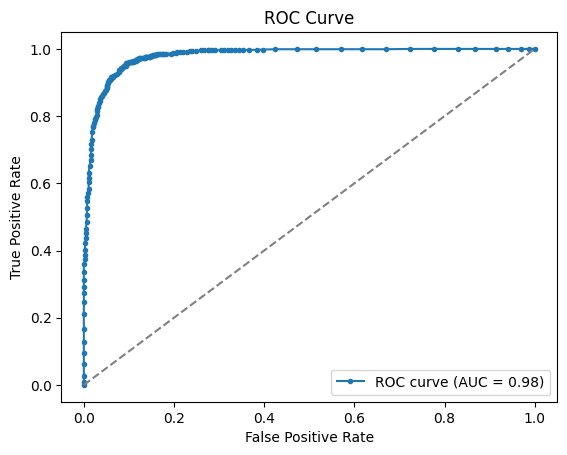

In [73]:
# Get predicted probabilities for the positive class (usually index 1)
y_prob = additional_model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc_score = roc_auc_score(y_test, y_prob)
print("AUC score:", auc_score)

plt.figure()

plt.plot(fpr, tpr, marker='.', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random chance

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.show()

## Conclusion

### Write a short summary of what you have found.

#### In this second assignment, we:
#### (1) Demonstrated the importance of preparing our data correctly (removing outlier observations, removing features with correlation under 0.3 with the target, filling NaN values with the mean of the dataset, scaling the data).
#### (2) Shown that dealing with categorical data can be done in many different ways (LabelEncoding, removing categorical data with too much unique values, transforming zip_codes).
#### (3) Illustrated that generating new features is extremely important to get a better model fit and also in choosing our model (GBM was the best at first, but introducing new features made the Boosting Classifier better by far on all performance metrics).